In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [31]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

# Initialize Stemmer and Lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [33]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
df = pd.read_csv("/content/spam.csv", encoding='latin1', index_col=False)

In [35]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [37]:
class_label = df.v1.factorize()
class_label

(array([0, 0, 1, ..., 0, 0, 0]), Index(['ham', 'spam'], dtype='object'))

In [ ]:
# sms = df.v2.values
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(sms)
# vocab_size = len(tokenizer.word_index) + 1
# encoded_docs = tokenizer.texts_to_sequences(sms)
# padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [38]:
sms = df.v2.values

# Preprocess text
processed_sms = []
for text in sms:
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]
    # Perform stemming or lemmatization
    # Uncomment one of the following lines based on your preference
    # Stemming
    words = [porter.stem(word) for word in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    processed_sms.append(' '.join(words))

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(processed_sms)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(processed_sms)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [39]:
print(sms[0])
print(encoded_docs[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[5, 3774, 308, 674, 570, 1149, 46, 74, 256, 1150, 91, 2581, 1151, 21, 3775, 81]


In [40]:
class_label[0]

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
padded_sequence

array([[   0,    0,    0, ...,   21, 3775,   81],
       [   0,    0,    0, ...,  369,    1, 1681],
       [   0,    0,    0, ...,  310, 2582,    4],
       ...,
       [   0,    0,    0, ...,    0, 1146, 1494],
       [   0,    0,    0, ...,  886,    1,   16],
       [   0,    0,    0, ..., 2325,  396,  185]], dtype=int32)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, class_label[0], test_size=0.2, random_state=42)

In [43]:
svm_classifier = SVC()

In [44]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [45]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [46]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9022421524663677


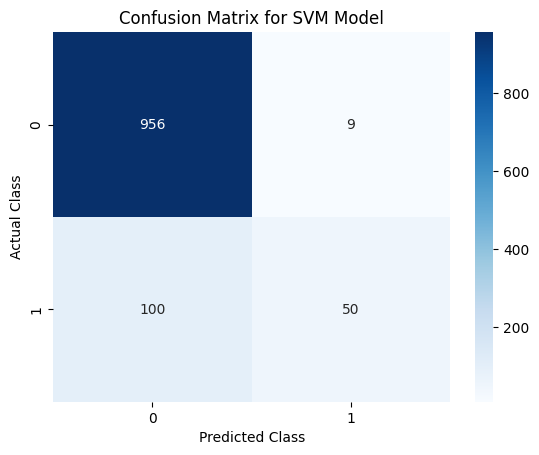

In [47]:
# prompt: make confusion matrix for the svm model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


In [ ]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
predict_sentimentsvm()

In [18]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           239136    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 255787 (999.17 KB)
Trainable params: 255787 (999.17 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [19]:
history = model.fit(padded_sequence,class_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
140/140 [==============================] - 120s 815ms/step - loss: 0.2749 - accuracy: 0.9055 - val_loss: 0.0899 - val_accuracy: 0.9803
Epoch 2/5
140/140 [==============================] - 96s 689ms/step - loss: 0.0651 - accuracy: 0.9832 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 3/5
140/140 [==============================] - 95s 675ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 0.0420 - val_accuracy: 0.9892
Epoch 4/5
140/140 [==============================] - 96s 686ms/step - loss: 0.0269 - accuracy: 0.9935 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 5/5
140/140 [==============================] - 96s 690ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.0387 - val_accuracy: 0.9901


In [20]:
# Get the test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

35/35 [==============================] - 2s 59ms/step - loss: 0.0165 - accuracy: 0.9964
Test Loss: 0.016508786007761955
Test Accuracy: 0.9964125752449036


In [21]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", class_label[1][prediction])

In [22]:
predict_sentiment("Congratulations! You’ve won a $500 gift card to Target. Click here to claim your reward.")

1/1 [==============================] - 0s 272ms/step
Predicted label:  spam


35/35 [==============================] - 3s 94ms/step


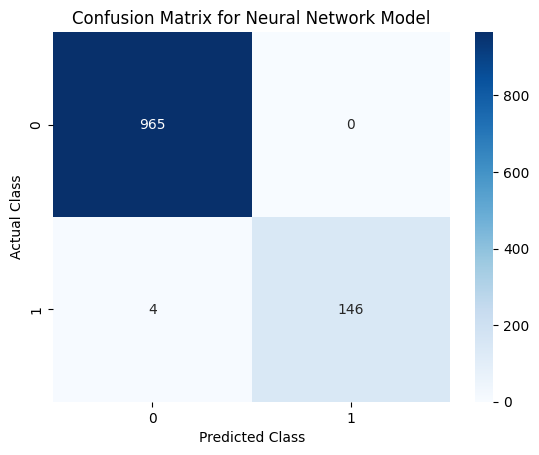

In [51]:
# Get the predictions for the test set
y_pred_nn = model.predict(X_test)

# Convert the predictions to binary values
y_pred_nn = np.where(y_pred_nn > 0.5, 1, 0)

# Get the confusion matrix
cf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Visualize the confusion matrix
sns.heatmap(cf_matrix_nn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Neural Network Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()